In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.multiprocessing as mp
import torch.nn as nn
from torch import optim
import copy
from matplotlib.cm import get_cmap

import torchvision

In [10]:
!ls /mnt/c/Users/nico9/Desktop/results

mnist_async_0.0001_0.9_64_normal


In [2]:
# Load the data from the file
data = np.load('./results/mnist_async_0.0001_0.9_64_normal/data_pca.npy')

In [3]:
data.shape

(300, 1199882)

In [25]:
files = [f for f in os.listdir("./home/results/dnn_mnist_async/") if f.endswith(".txt")]

FileNotFoundError: [Errno 2] No such file or directory: './home/results/dnn_mnist_async/'

/tmp/ipykernel_14829/1656082600.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


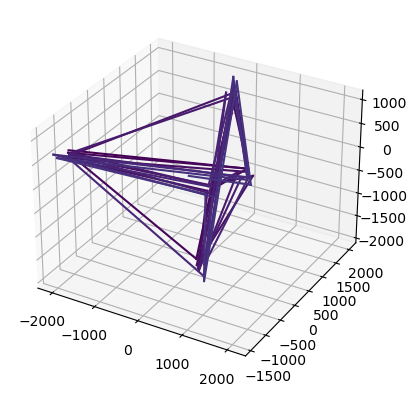

In [6]:
# Normalize the data
data = np.load('/mnt/c/Users/nico9/Desktop/results/mnist_async_0.0001_0.9_64_normal/data_pca.npy')
data = torch.from_numpy(data)
data = (data - torch.mean(data, dim=0)) / torch.std(data, dim=0)

# Compute the principal components
#U, S, V = torch.pca_lowrank(data)[2]#torch.linalg.svd(data)
cmap = get_cmap('viridis')

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
# Project the data onto the first two principal components
data_pca = torch.mm(data, torch.pca_lowrank(data)[2][:, :3])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Plot the projected data
colors = sm.to_rgba(np.arange(0, len(data_pca)-1))

# Plot each segment of the line with a different color
for i in range(len(data_pca) - 1):
     plt.plot([data_pca[i,0], data_pca[i+1,0]], [data_pca[i,1], data_pca[i+1,1]], [data_pca[i,2], data_pca[i+1,2]], color=colors[i])
#ax.scatter(data_pca[:, 0], data_pca[:, 1], data[:, 2],  c=np.arange(0, len(data)))

In [26]:
y.mean()

tensor(-1.6276e-05)

In [2]:
import numpy as np
import plotly.graph_objs as go

# Generate some random data
data = np.load('./results/mnist_async_0.0001_0.9_64_normal/data_pca.npy')
data = torch.from_numpy(data)
data = (data - torch.mean(data, dim=0)) / torch.std(data, dim=0)
data_pca = torch.mm(data, torch.pca_lowrank(data)[2][:, :3])

x, y, z = data_pca[:, 0], data_pca[:, 1], data[:, 2]

# Create the trace for the line plot
line = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(
        color=np.linspace(0,700,len(x)-1),

        colorbar=dict(
            title='Index'
        ),
        reversescale=True,
        width=2
    )
)

# Create the layout for the plot
layout = go.Layout(
    title='Interactive 3D Line Plot',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Combine the trace and layout into a figure object
fig = go.Figure(data=[line], layout=layout)

# Display the plot
fig.show()


RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 3839622400 bytes. Error code 12 (Cannot allocate memory)

In [41]:
data.shape

torch.Size([800, 1199882])

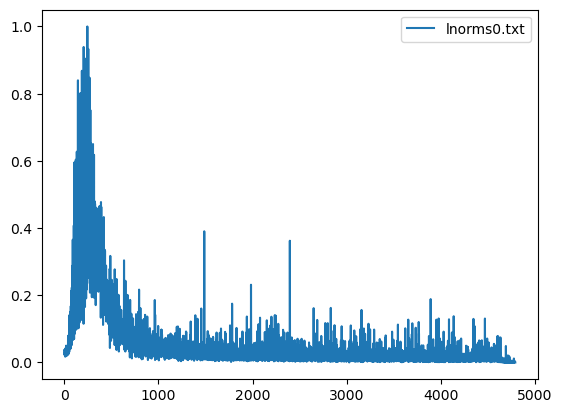

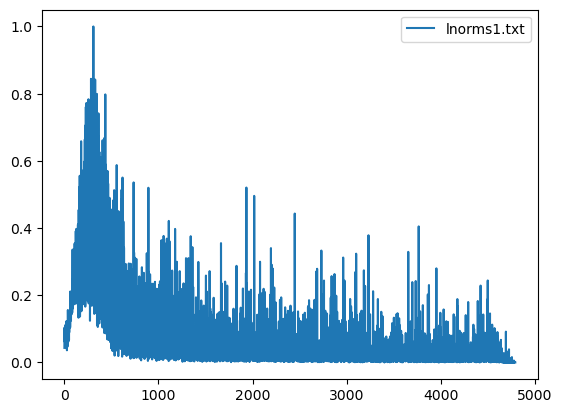

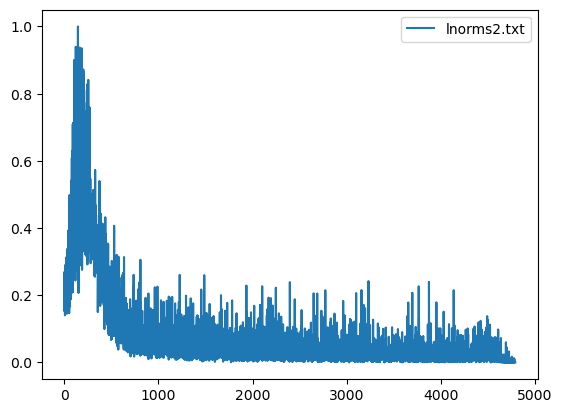

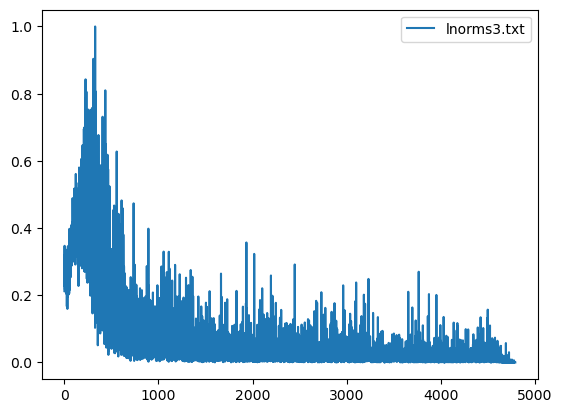

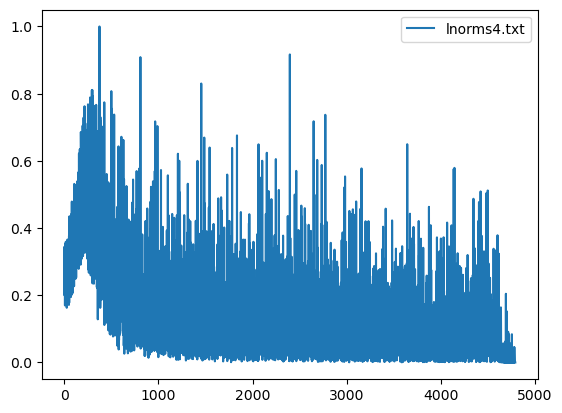

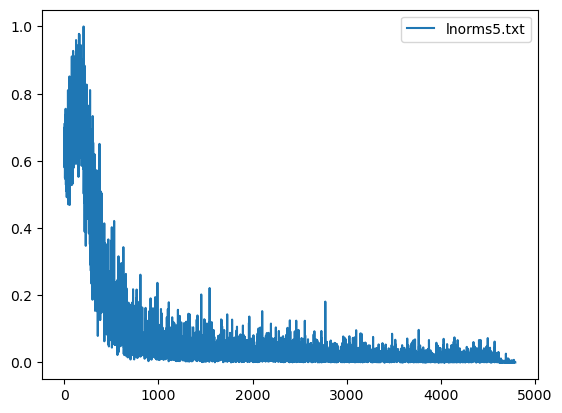

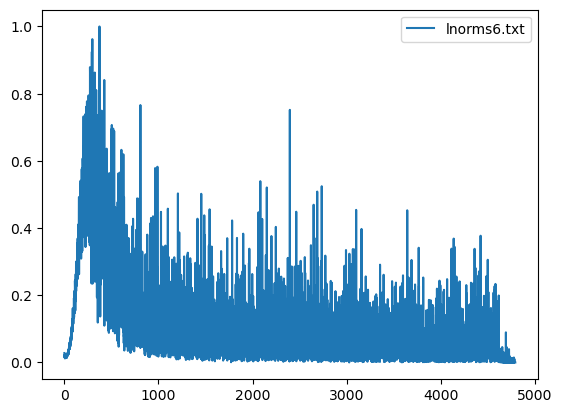

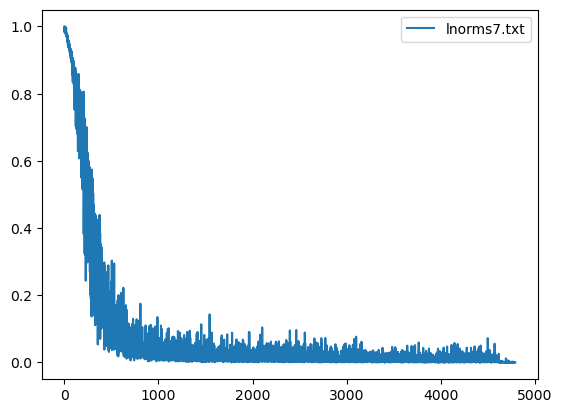

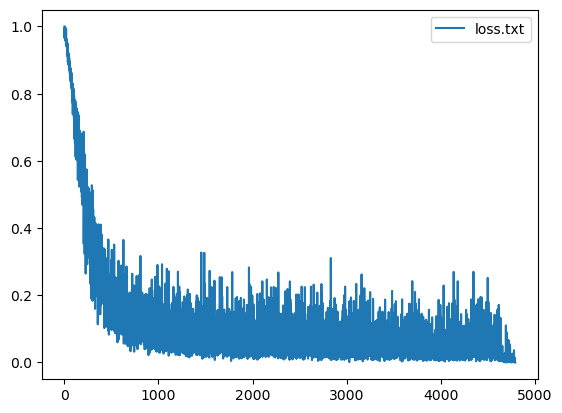

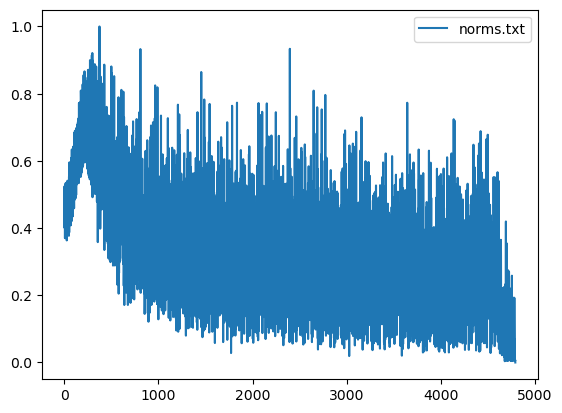

<Figure size 640x480 with 0 Axes>

In [8]:
for f in files:
    arr = np.loadtxt("./home/results/dnn_mnist_async/"+f)
    arr = (arr-min(arr))/(max(arr)-min(arr))
    plt.plot(range(len(arr)), arr, label = f)
    plt.legend()
    plt.figure()

In [16]:
dataset = torchvision.datasets.MNIST('./data/mnist_data', 
                                                    download=True, 
                                                    train=False,
                                                    transform=torchvision.transforms.Compose([
                                                        torchvision.transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                        torchvision.transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                    ]))

In [18]:
dataset.train_labels

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([7, 2, 1,  ..., 4, 5, 6])

In [21]:
idx = dataset.train_labels==1
idx

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([False, False,  True,  ..., False, False, False])

In [23]:
idx = dataset.train_labels==1
dataset1 = dataset.train_labels[idx]
dataset2 = dataset.train_data[idx]

c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\Users\nico9\anaconda3\envs\optml\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [31]:
idx.numpy()

array([False, False,  True, ..., False, False, False])

In [32]:
dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [29]:
dataset[idx.numpy()]

ValueError: only one element tensors can be converted to Python scalars

In [35]:
idx = dataset.targets==1
dataset.data = dataset.data[idx]
dataset.targets = dataset.targets[idx]

In [38]:
dataset2 = copy.deepcopy(dataset)

In [51]:
dataset2.root_dir = "./data/"

In [52]:
dataset2

Dataset MNIST
    Number of datapoints: 1135
    Root location: ./data/mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [53]:
h = iter(torch.utils.data.DataLoader(dataset2, 
                                batch_size=34, 
                                shuffle=True))

In [54]:
next(h)

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       